In [3]:
import numpy as np
import numpy.ctypeslib as nptypes
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from typing import Tuple

In [175]:
def one_vs_one(
    metrics_model_1,
    metrics_model_2,
    model_1_name: str = 'Model 1',
    model_2_name: str = 'Model 2',
    figsize: Tuple[float, float] = (6.4, 4.8),
    metric_name: str = 'performance',
    show_region_names: bool = True,
    legend_title: str = None,
    results_colors = ['blue', 'green', 'red']
):
    if not isinstance(metrics_model_1, np.ndarray):
        metrics_model_1 = np.array(metrics_model_1)
    if not isinstance(metrics_model_2, np.ndarray):
        metrics_model_2 = np.array(metrics_model_2)

    assert metrics_model_1.shape not ()
    assert metrics_model_2.shape not ()

    assert metrics_model_1.shape == metrics_model_2.shape

    assert isinstance(figsize, tuple)
    assert isinstance(model_1_name, str) and isinstance(model_2_name, str)

    fig, ax = plt.subplots(figsize=figsize)

    ax.set_title(f'One vs One Comparison: {model_1_name} vs {model_2_name}')

    # Draw line
    ax.plot([0, 1], [0, 1], '--', color='gray')

    # Plot lost cases
    loss_counts = np.array([metrics_model_1[metrics_model_1 < metrics_model_2]]).shape[-1]

    ax.scatter(
        metrics_model_1[metrics_model_1 < metrics_model_2],
        metrics_model_2[metrics_model_1 < metrics_model_2],
        c='red',
        label=f'{loss_counts} losses'
    )

    # Plot draw cases
    draw_counts = np.array([metrics_model_1[metrics_model_1 == metrics_model_2]]).shape[-1]

    ax.scatter(
        metrics_model_1[metrics_model_1 == metrics_model_2],
        metrics_model_2[metrics_model_1 == metrics_model_2],
        c='green',
        label=f'{draw_counts} draws'
    )

    # Plot win cases
    win_counts = np.array([metrics_model_1[metrics_model_1 > metrics_model_2]]).shape[-1]

    ax.scatter(
        metrics_model_1[metrics_model_1 > metrics_model_2],
        metrics_model_2[metrics_model_1 > metrics_model_2],
        c='blue',
        label=f'{win_counts} wins'
    )

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(reversed(handles), reversed(labels), title=None, loc='lower right')

    ax.text(
        0.55, 0.3,
        f'{model_1_name} is\nbetter here', alpha=0.3,
        fontsize=18
    )

    ax.text(
        0.1, 0.6,
        f'{model_2_name} is\nbetter here', alpha=0.3,
        fontsize=18
    )

    ax.set_xlim([0., 1.])
    ax.set_xlabel(f'{model_1_name} {metric_name}')
    ax.set_ylim([0., 1.])
    ax.set_ylabel(f'{model_2_name} {metric_name}')

    return fig, ax

In [183]:
np.array(3.0).shape == ()

True

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'One vs One Comparison: KNN vs RandomForest'}, xlabel='KNN performance', ylabel='RandomForest performance'>)

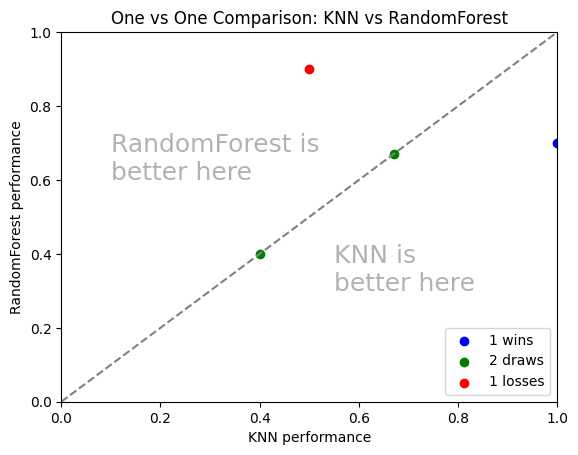

In [176]:
one_vs_one(np.array([1, 0.5, 0.4, 0.67]), np.array([0.7, 0.9, 0.4, 0.67]), 'KNN', 'RandomForest')